# K-nearest Neighbors


A commonly used distance metric for continuous variables is ***Euclidean distance***:

$$d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{k=1}^p (x_{i,k} - x_{j,k})^2}$$

The k-NN algorithm is known as a "lazy learner" because it doesn't build a model or make generalizations during training. Instead, it memorizes the training data and uses it during classification. This makes it computationally inexpensive during the training phase, but potentially slower during the classification phase as it has to compare the test point to all training points.

The training phase in KNN as the algorithm "remembering" the locations and labels of the training data points. This allows it to efficiently identify the K nearest neighbors for any new data point without having to recalculate distances from scratch.

By using the stored training data, KNN avoids the need for iterative updates or model parameter estimation typically seen in other machine learning algorithms. Instead, it relies on the stored information to make predictions based on the majority class of the K nearest neighbors.


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create synthetic dataset
X = np.array([[2.75, 1.25],
              [1.85, 1.20],
              [3.25, 2.10],
              [2.85, 2.45],
              [3.45, 2.40],
              [4.50, 3.60],
              [4.75, 4.00],
              [5.25, 4.35],
              [5.65, 5.00],
              [6.20, 5.50]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the K-nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


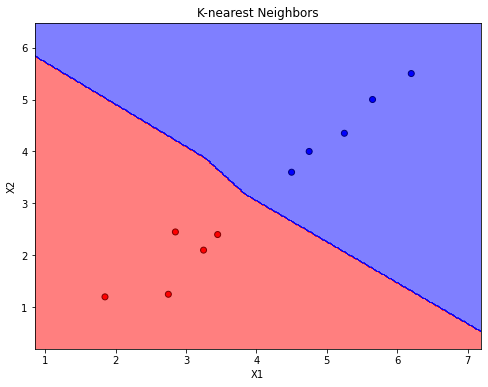

In [8]:
from matplotlib.colors import ListedColormap

# Plot the data points and decision boundary
plt.figure(figsize=(8, 6))
cmap = ListedColormap(['red', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-nearest Neighbors')
h = 0.02  # Step size in the mesh
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                       np.arange(x2_min, x2_max, h))
Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
plt.show()